In [93]:
#Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import requests
from config import weather_api_key
import time
from datetime import datetime

In [32]:
#Create a set of random latitude and longitude combinations
lats = np.random.uniform(low=-90.000, high=90.000, size = 1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size = 1500)
lat_lngs = zip(lats, lngs)

In [33]:
#Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [79]:
#Create a list for holding the cities
cities = []

#Identify the nearest city for each lat and long combination
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    #If the city is unique, then add it to the list
    if city not in cities:
        cities.append(city)

len(cities)

618

In [84]:
#Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3ee057398ad8896d92f03e0183e7d81f


In [96]:
#Create an empty list to hold the weather data.
city_data = []

#Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

#Create counters.
record_count = 1
set_count = 1

#Loop through all the cities in the list.
for i, city in enumerate(cities):

    #Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    #Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    #Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    #Add 1 to the record count.
    record_count += 1
    
    try:
        #Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        
        #Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
       
        #Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        #Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

#If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

#Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kongoussi
Processing Record 2 of Set 1 | hobart
Processing Record 3 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 4 of Set 1 | busselton
Processing Record 5 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 6 of Set 1 | sur
Processing Record 7 of Set 1 | touros
Processing Record 8 of Set 1 | avarua
Processing Record 9 of Set 1 | ushuaia
Processing Record 10 of Set 1 | atuona
Processing Record 11 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 12 of Set 1 | nishihara
Processing Record 13 of Set 1 | khatanga
Processing Record 14 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 15 of Set 1 | damghan
Processing Record 16 of Set 1 | nikolskoye
Processing Record 17 of Set 1 | saint-philippe
Processing Record 18 of Set 1 | chokurdakh
Processing Record 19 of Set 1 | ponta do sol
Processing Record 20 of Set 1 | illoqqortoor

In [97]:
#Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kongoussi,13.3258,-1.5347,77.45,79,99,4.21,BF,2022-09-22 19:10:59
1,Hobart,-42.8794,147.3294,54.27,93,100,0.00,AU,2022-09-22 19:10:59
2,Busselton,-33.6500,115.3333,45.34,82,0,8.12,AU,2022-09-22 19:11:00
3,Sur,22.5667,59.5289,82.22,71,1,14.50,OM,2022-09-22 19:11:00
4,Touros,-5.1989,-35.4608,81.36,65,7,15.01,BR,2022-09-22 19:11:01
5,Avarua,-21.2078,-159.7750,75.25,73,75,12.66,CK,2022-09-22 19:11:01
6,Ushuaia,-54.8000,-68.3000,51.46,32,20,11.50,AR,2022-09-22 19:11:02
7,Atuona,-9.8000,-139.0333,76.71,74,8,16.91,PF,2022-09-22 19:07:06
8,Nishihara,26.1842,127.7558,78.85,97,40,4.61,JP,2022-09-22 19:11:03
9,Khatanga,71.9667,102.5000,20.10,85,18,10.98,RU,2022-09-22 19:11:03


In [100]:
#Reorder columns
city_data_df = city_data_df[['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Kongoussi,BF,2022-09-22 19:10:59,13.3258,-1.5347,77.45,79,99,4.21
1,Hobart,AU,2022-09-22 19:10:59,-42.8794,147.3294,54.27,93,100,0.00
2,Busselton,AU,2022-09-22 19:11:00,-33.6500,115.3333,45.34,82,0,8.12
3,Sur,OM,2022-09-22 19:11:00,22.5667,59.5289,82.22,71,1,14.50
4,Touros,BR,2022-09-22 19:11:01,-5.1989,-35.4608,81.36,65,7,15.01
...,...,...,...,...,...,...,...,...,...
569,La Carlota,PH,2022-09-22 19:27:14,10.4233,122.9208,77.85,88,100,4.47
570,Manzanillo,CU,2022-09-22 19:27:14,20.3433,-77.1167,87.46,60,87,8.52
571,Luanda,AO,2022-09-22 19:27:15,-8.8368,13.2343,73.40,83,40,9.22
572,El Alto,PE,2022-09-22 19:27:17,-4.2714,-81.2147,71.26,71,100,14.05


In [102]:
#Create the output file (CSV).
output_data_file = "Weather Data/cities.csv"

#Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

# Plotting the Data

In [103]:
#Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

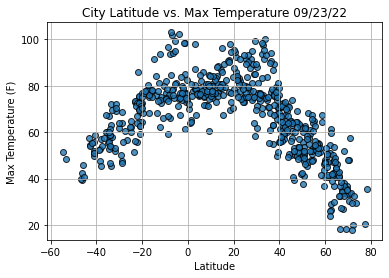

In [106]:
#Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats, max_temps, edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure.
plt.savefig("Weather Data/Fig1.png")

#Show plot.
plt.show()

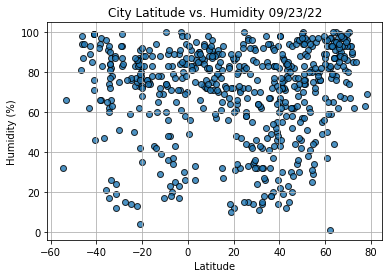

In [109]:
#Build the scatter plots for latitude vs. humidity.
plt.scatter(lats, humidity, edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

#Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure.
plt.savefig("Weather Data/Fig2.png")

#Show plot.
plt.show()

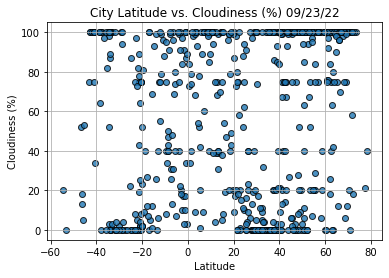

In [110]:
#Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats, cloudiness, edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

#Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure.
plt.savefig("Weather Data/Fig3.png")

#Show plot.
plt.show()

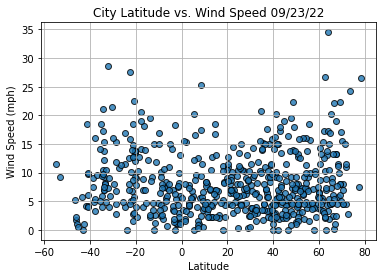

In [111]:
#Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats, wind_speed, edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

#Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

#Save the figure.
plt.savefig("Weather Data/Fig4.png")

#Show plot.
plt.show()